In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [387]:
raw_data = pd.read_excel('../data/titanic.xls')

In [388]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [389]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [390]:
raw_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


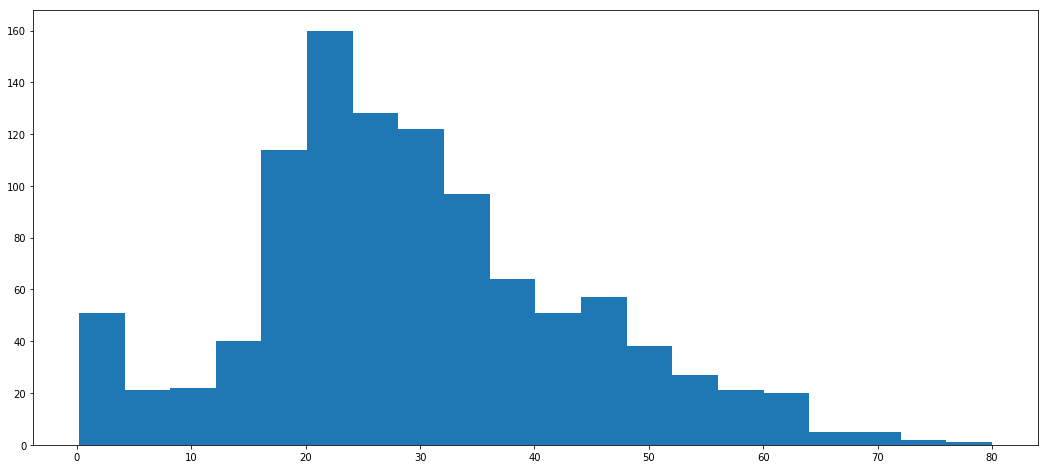

In [391]:
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False);

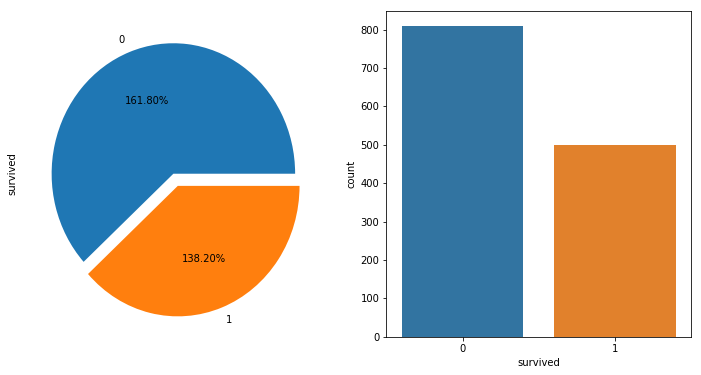

In [392]:
f, ax = plt.subplots(1,2,figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='1%.2f%%', ax=ax[0])
sns.countplot('survived', data=raw_data, ax=ax[1])

In [393]:
raw_data.groupby('pclass').mean()
# 인사이트: 등급이 높을수록 많이 살았다. 나이는 등급이 높을수록 많았다.


,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [394]:
raw_data.groupby('pclass').count() # 등급별 인원을 세워봤음.
# 인사이트: 3등급이 인원이 제일 많았다.
# 1등급이 보트를 제일 많이 탔다.

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321,201,35,289
2,277,277,277,261,277,277,277,277,23,277,112,31,261
3,709,709,709,501,709,709,709,708,16,709,173,55,195


In [395]:
# 컬럼: 속성, 특성, 항목, 요소 => feature(피쳐)
# 피쳐가 많은 경우, 1) 항목들을 제거, 
# 2) 항목들이 크게 분석할 것과 상관이 없으면 제거
# - 수학적 공분산 계산: 숫자가 커지면 공분산이 커짐.
# - 상관도 계산: 숫자를 -1~1사이로 범위로 정해서 상관관계를 분석
# 피쳐들을 선택, 전처리 등: 피쳐엔지니어링(속성공학)

In [396]:
raw_data.corr() #각 항목드르이 상관도(-1~1)를 구해줌
# 상관관계를 구했는데,
# 0: 컬럼간에 전혀 상관이 없다.
# 1: 완벽히 상관이 있다. (양)
# -1: 완벽히 상관이 있다.(음)
# +- 0.3 : 약간 상관이 있다.
# +- 0.5 : 상관이 있다.
# +- 0.7: 꽤 큰 상관이 있다.

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [397]:
# 피쳐들간의 상관을 한눈에 알고 싶으면, 그래프를 써라!
# 상관도를 알 수 있는 그래프: heatmap

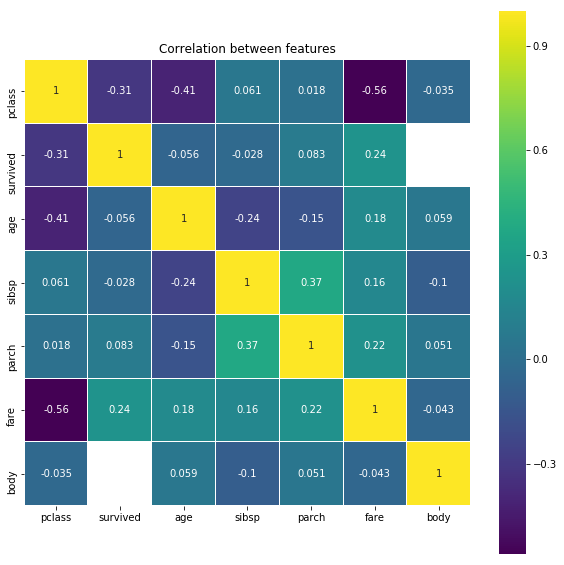

In [398]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [399]:
raw_data['age_cat'] = pd.cut(raw_data['age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [400]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


In [401]:
raw_data.groupby('age_cat').count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
age_cat,,,,,,,,,,,,,,
baby,41,41,41,41,41,41,41,41,41,7,41,26,1,25
children,25,25,25,25,25,25,25,25,25,5,25,16,0,14
teenage,49,49,49,49,49,49,49,49,49,5,49,21,3,29
young,494,494,494,494,494,494,494,494,494,82,494,178,43,289
adult,404,404,404,404,404,404,404,404,404,155,403,168,63,302
old,33,33,33,33,33,33,33,33,32,18,32,8,10,26


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


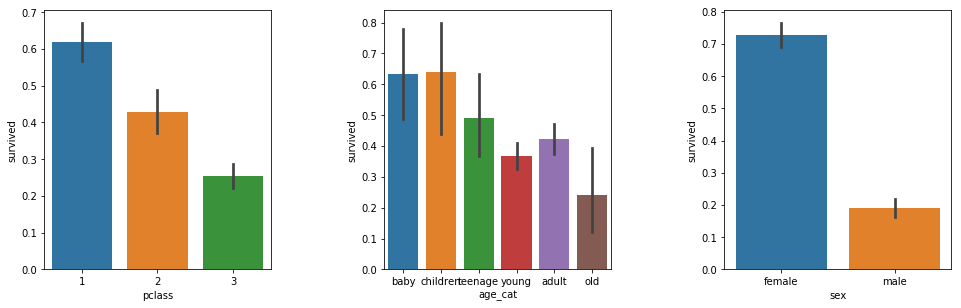

In [402]:
plt.figure(figsize=[14,4])
plt.subplot(131) # '한' 행에 '3'개를 넣을 예정인데, 아래에 있는것이 '첫'번째 그래프임.
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

In [403]:
# raw_data['boat'].notnull() => true/false
boat_survivors = raw_data[raw_data['boat'].notnull()]
# []의 조건중 true인것만 가져옴
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


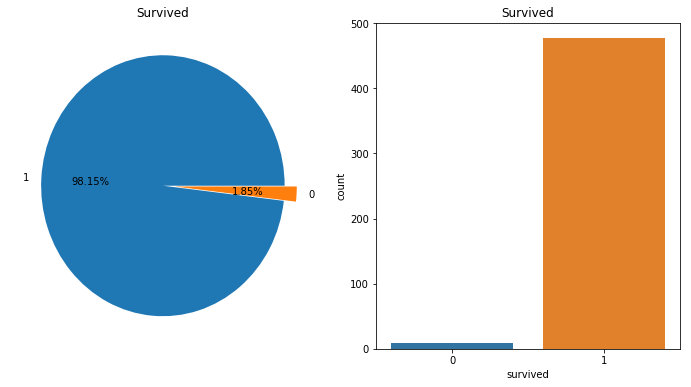

In [404]:
# 보트 탄 사람들 중 생존자/비생존자를 파이차트와 카운트플롯으로 그려보시오.
f, ax = plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [405]:
raw_data.dtypes

pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
age_cat      category
dtype: object

In [406]:
raw_data['name'][0] # 첫번째 이름 추출

'Allen, Miss. Elisabeth Walton'

In [407]:
raw_data['name'][0].split(',') # 콤마 기준으로 분리

['Allen', ' Miss. Elisabeth Walton']

In [408]:
raw_data['name'][0].split(',')[1] # 분리한 것중 두번째 것

' Miss. Elisabeth Walton'

In [409]:
raw_data['name'][0].split(',')[1].split('.') # 그것을 온점 기준으로 분리

[' Miss', ' Elisabeth Walton']

In [410]:
raw_data['name'][0].split(',')[1].split('.')[0] # 분리한 것 중 첫번째 것.

' Miss'

In [411]:
raw_data['name'][0].split(',')[1].split('.')[0].strip() # 스트립으로 공백 제거

'Miss'

In [412]:
len(raw_data['name'][0].split(',')[1].split('.')[0].strip()) # 글자 수 세기

4

In [413]:
# 개인적인 분석
# 남자 탑승객: '제가 이 아이의 아버지입니다'는 대사로 생존을 위한 보트에 탑승하게 됨.
# 남성 승객들 중, 친족의 탑승 여부는 그 사람의 생존과 연관이 있지 않았을까?
raw_dataM = raw_data[raw_data['sex'] == 'male']
raw_dataMC = raw_dataM.iloc[:,[1,3,6]]
raw_dataMC

,survived,sex,parch
1,1,male,2
3,0,male,2
5,1,male,0
7,0,male,0
9,0,male,0
10,0,male,0
14,1,male,0
15,0,male,0
16,0,male,1
19,0,male,0


In [414]:
# 친족 동승자가 있었냐 없었냐와의 상관관계를 분석하기 위해 0이 아닌경우는 모두 1로 변경
raw_dataMC[raw_dataMC['parch'] != 0] = 1
raw_dataMC

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,survived,sex,parch
1,1,1,1
3,1,1,1
5,1,male,0
7,0,male,0
9,0,male,0
10,0,male,0
14,1,male,0
15,0,male,0
16,1,1,1
19,0,male,0


In [415]:
raw_dataMC.corr() # 상관도 0.67: 상당히 유의미한 상관관계를 도출하는데 성공함.

,survived,parch
survived,1.000000,0.665768
parch,0.665768,1.000000


In [416]:
def call(x):
    print(x + 100)

In [417]:
call(100) #한줄씩 번역해서 실행

200


In [418]:
# 프로그램 언어 분류: 번역해서 실행방식을 기준
# 한줄씩 번역해서 실행(interpreter, 인터프리터): 인터프리터 언어, 파이썬, R
# 통째로 번역해서 실행(compiler, 컴파일러): 속도가 빠르다. 컴파일 언어, 자바, C++

In [419]:
test = lambda x: x + 2 #x는 입력값, x + 2: 입력값 x에 들어있는 값에 2를 더해라.
test(2)

4

In [420]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [421]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
# list(map(conversion_rare, raw_data['name']))
raw_data['title'] = raw_data['name'].map(conversion_rare)

In [422]:
list1 = list(map(conversion_rare, raw_data['name']))
raw_data['title'] = list1
type(raw_data['title'])
# list가 df의 컬럼이 되는 순간 Series로 변환됨.

pandas.core.series.Series

In [423]:
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [424]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [425]:
# raw_data.groupby('title').mean() : 모든 컬럼 다 보임
raw_data[['title', 'survived']].groupby('title').mean() #title, survived만 보임

,survived
title,
Miss,0.678030
Mr,0.162483
Mrs,0.787879
Rare,0.466667


In [426]:
tmp = ['f'] * 1309
raw_data2 = raw_data.copy()
raw_data2['sex'] = tmp
raw_data2['sex']

0       f
1       f
2       f
3       f
4       f
5       f
6       f
7       f
8       f
9       f
10      f
11      f
12      f
13      f
14      f
15      f
16      f
17      f
18      f
19      f
20      f
21      f
22      f
23      f
24      f
25      f
26      f
27      f
28      f
29      f
       ..
1279    f
1280    f
1281    f
1282    f
1283    f
1284    f
1285    f
1286    f
1287    f
1288    f
1289    f
1290    f
1291    f
1292    f
1293    f
1294    f
1295    f
1296    f
1297    f
1298    f
1299    f
1300    f
1301    f
1302    f
1303    f
1304    f
1305    f
1306    f
1307    f
1308    f
Name: sex, Length: 1309, dtype: object

In [427]:
tmp = []
for x in raw_data['sex']:
    if x == 'female':
        tmp.append(0)
    elif x == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [428]:
len(tmp)

1309

In [429]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [430]:
# 타입변환 to_frame(), astype('float')
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [431]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
title        1045 non-null object
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


In [432]:
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre
# data 준비 끝!

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
5,1.0,1.0,48.0000,0.0,0.0,26.5500
6,1.0,0.0,63.0000,1.0,0.0,77.9583
7,1.0,1.0,39.0000,0.0,0.0,0.0000
8,1.0,0.0,53.0000,2.0,0.0,51.4792
9,1.0,1.0,71.0000,0.0,0.0,49.5042


In [433]:
# 공부할 데이터/검증용 데이터 분리
# 머신러닝용 라이브러리: sklearn, 사이킷 런
from sklearn.model_selection import train_test_split

In [434]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, # 데이터 프레임의 속성들
                 raw_data[['survived']], # 맞추어야 할 정답
                 test_size = 0.1, # 테스트데이터 10%지정, 훈련데이터 90%할당
                 random_state = 13 #seed값
                )


In [435]:
len(X_train) #훈련용 데이터 문제

940

In [436]:
len(y_train) #훈련용 데이터의 해답

940

In [437]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [438]:
y_train.head()

,survived
710,0.0
423,0.0
646,1.0
596,1.0
286,0.0


In [439]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [521]:
from sklearn.tree import DecisionTreeClassifier

#학습기 객체 생성
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
#공부시키기
tree_clf.fit(X_train, y_train)
#train데이터를 가지고 공부한 점수
tree_clf.score(X_train, y_train)

0.8117021276595745

In [518]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test) #문제를 주고 풀어보라고 함. => 정답 return

#테스트데이터를 푼 답안과 해답을 비겨해서 정확도를 구해보자.
accuracy_score(y_test, y_pred)

0.8476190476190476

In [524]:
# 디카프리오는 생존할 수 있을까?
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]
me = [1., 1., 26., 1., 2., 200.] # 1등석 탈거야

In [479]:
tree_clf.predict_proba([winslet]) # 죽을 가능성 vs 살 가능성

array([[0.02419355, 0.97580645]])

In [480]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [525]:
tree_clf.predict_proba([me])

array([[0.65467626, 0.34532374]])